# A Hybrid Approach of Fuzzy Logic and Neural Networks for Diabetes Prediction

## Setup and Imports

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Metrics and Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    average_precision_score
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Additional Scientific Computing
import skfuzzy as fuzz
from scipy import stats

# Set Random Seeds for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 1. Data Loading and Initial Exploration

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

# Display Basic Information
print("Dataset Shape:", diabetes_data.shape)
print("\nColumn Information:")
print(diabetes_data.info())

# Basic Statistical Summary
print("\nDescriptive Statistics:")
print(diabetes_data.describe())

# Class Distribution
print("\nClass Distribution:")
print(diabetes_data['Outcome'].value_counts(normalize=True))

Dataset Shape: (768, 9)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.8

## 2. Exploratory Data Analysis (EDA)

In [3]:
features = diabetes_data.columns.drop('Outcome')

Pair Plot

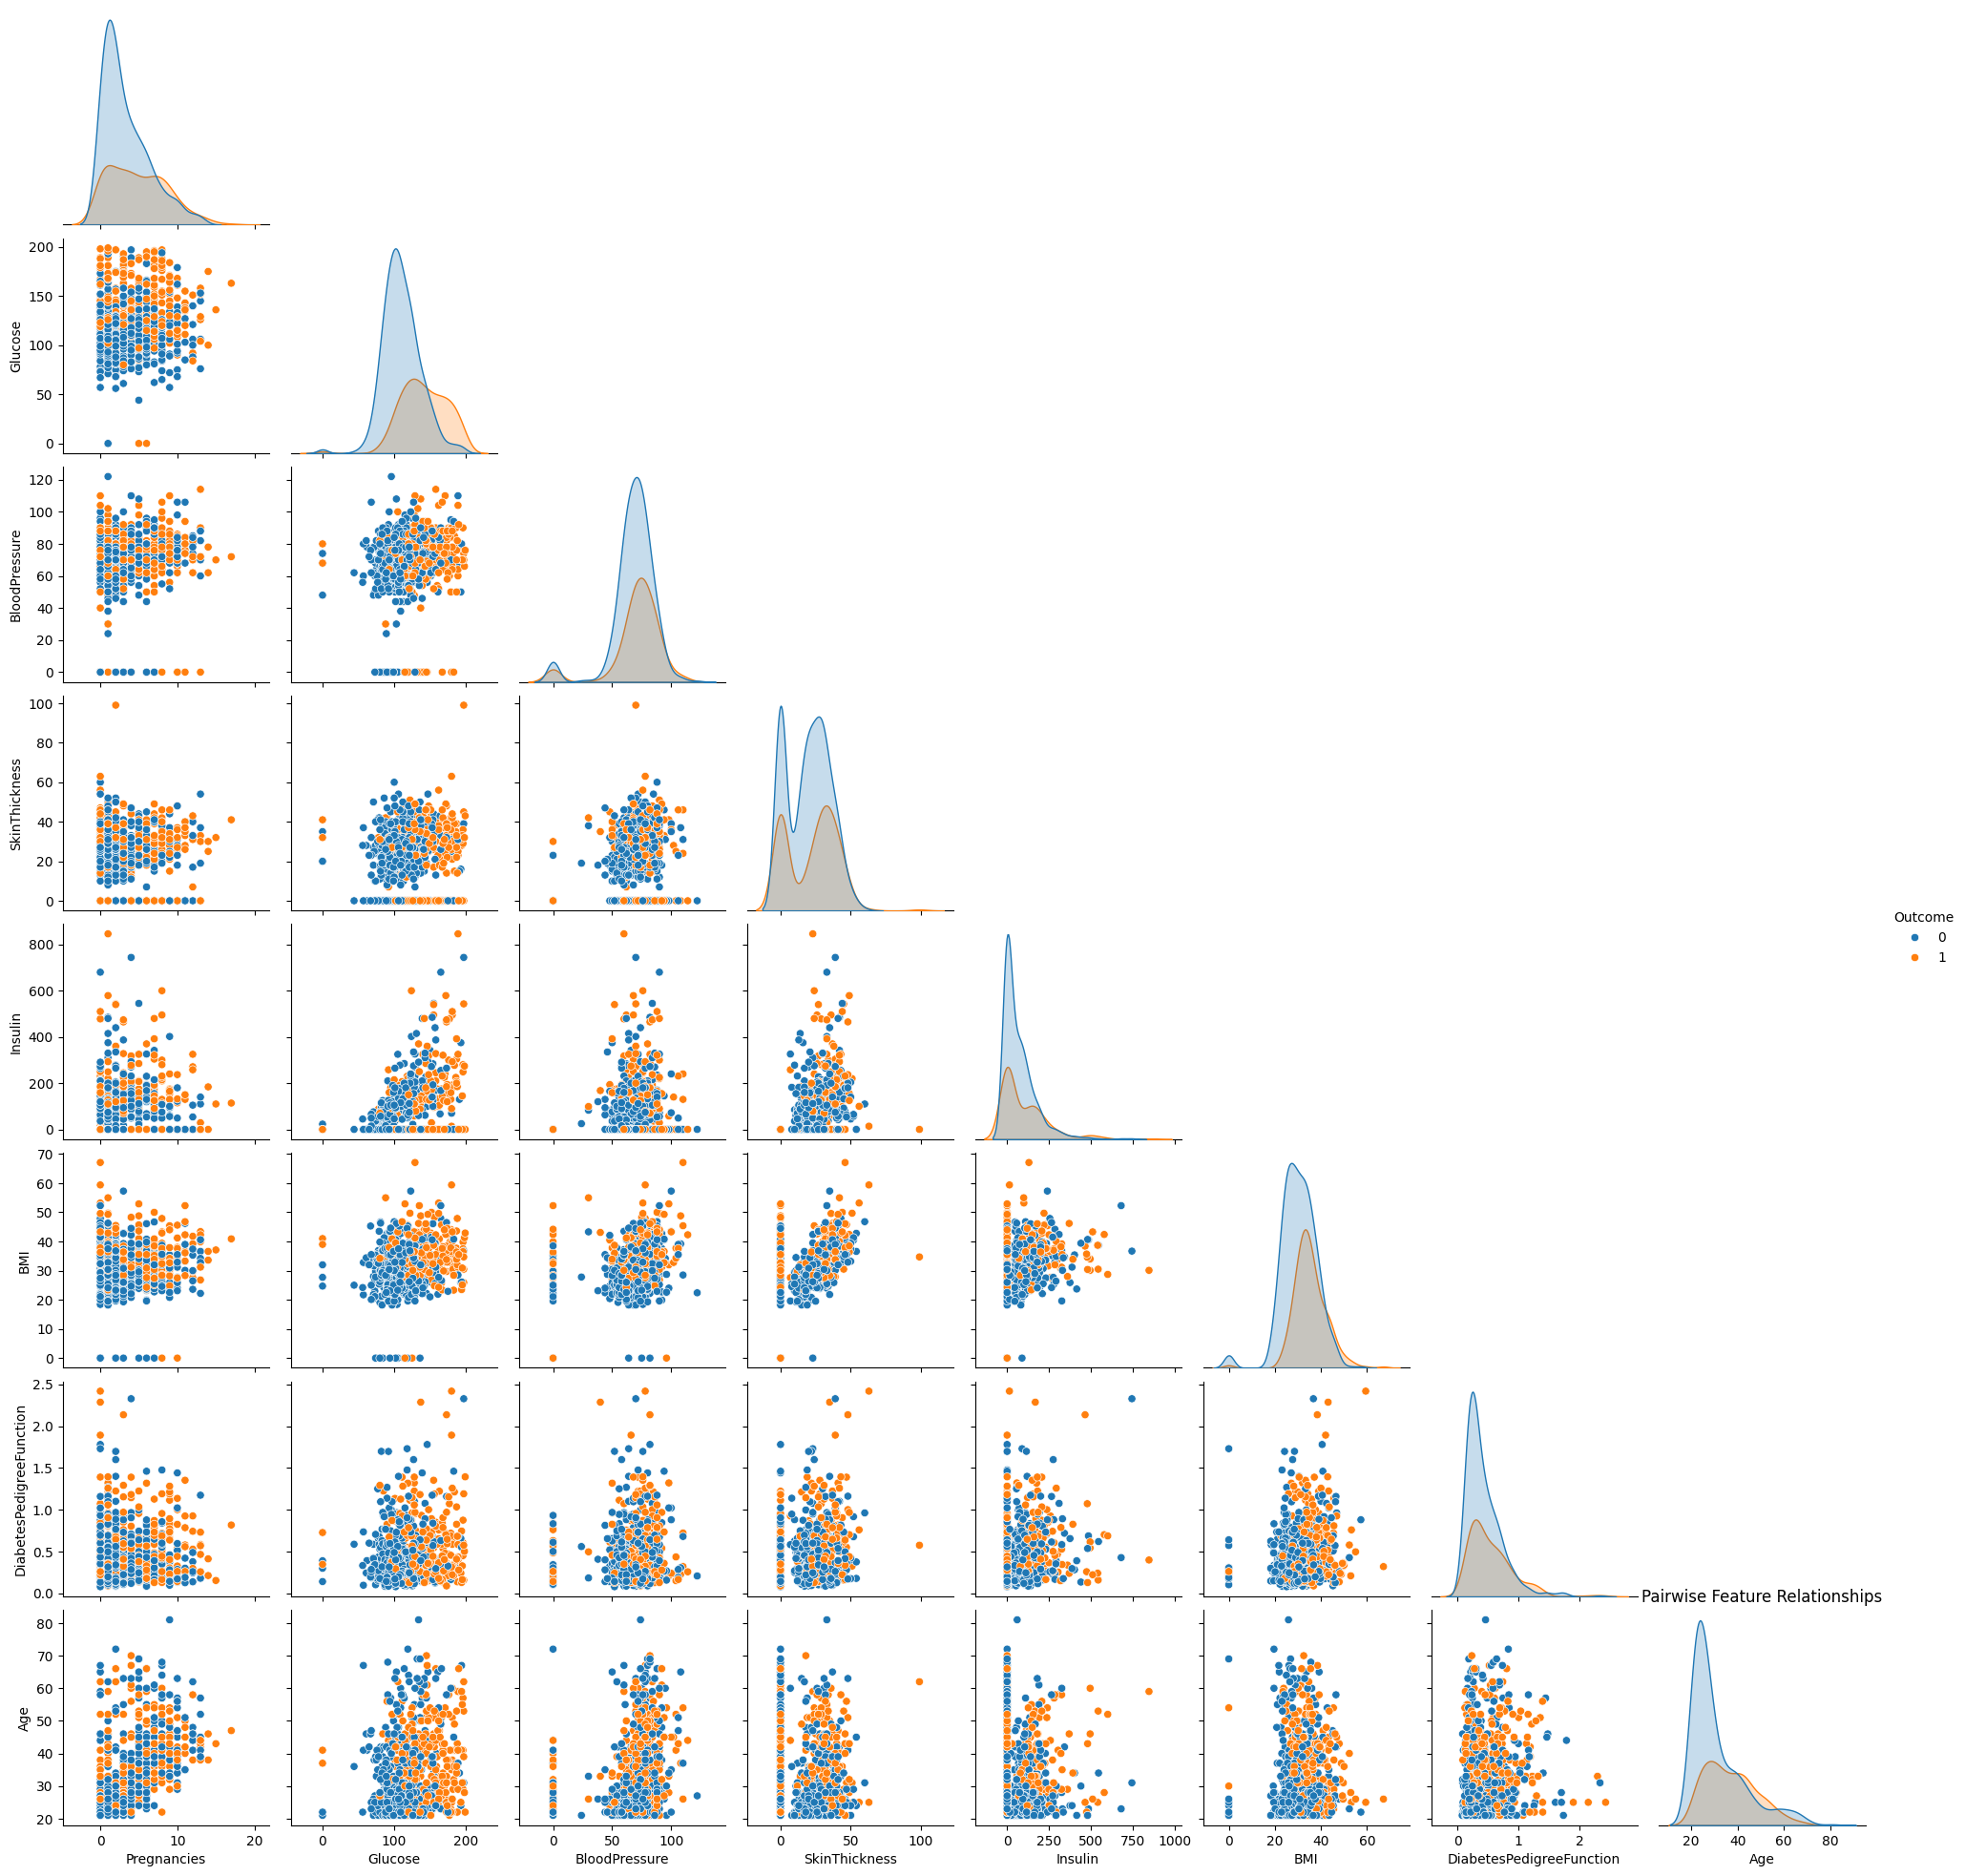

In [4]:
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde', corner=True)
plt.title('Pairwise Feature Relationships')
plt.show()

Boxplots

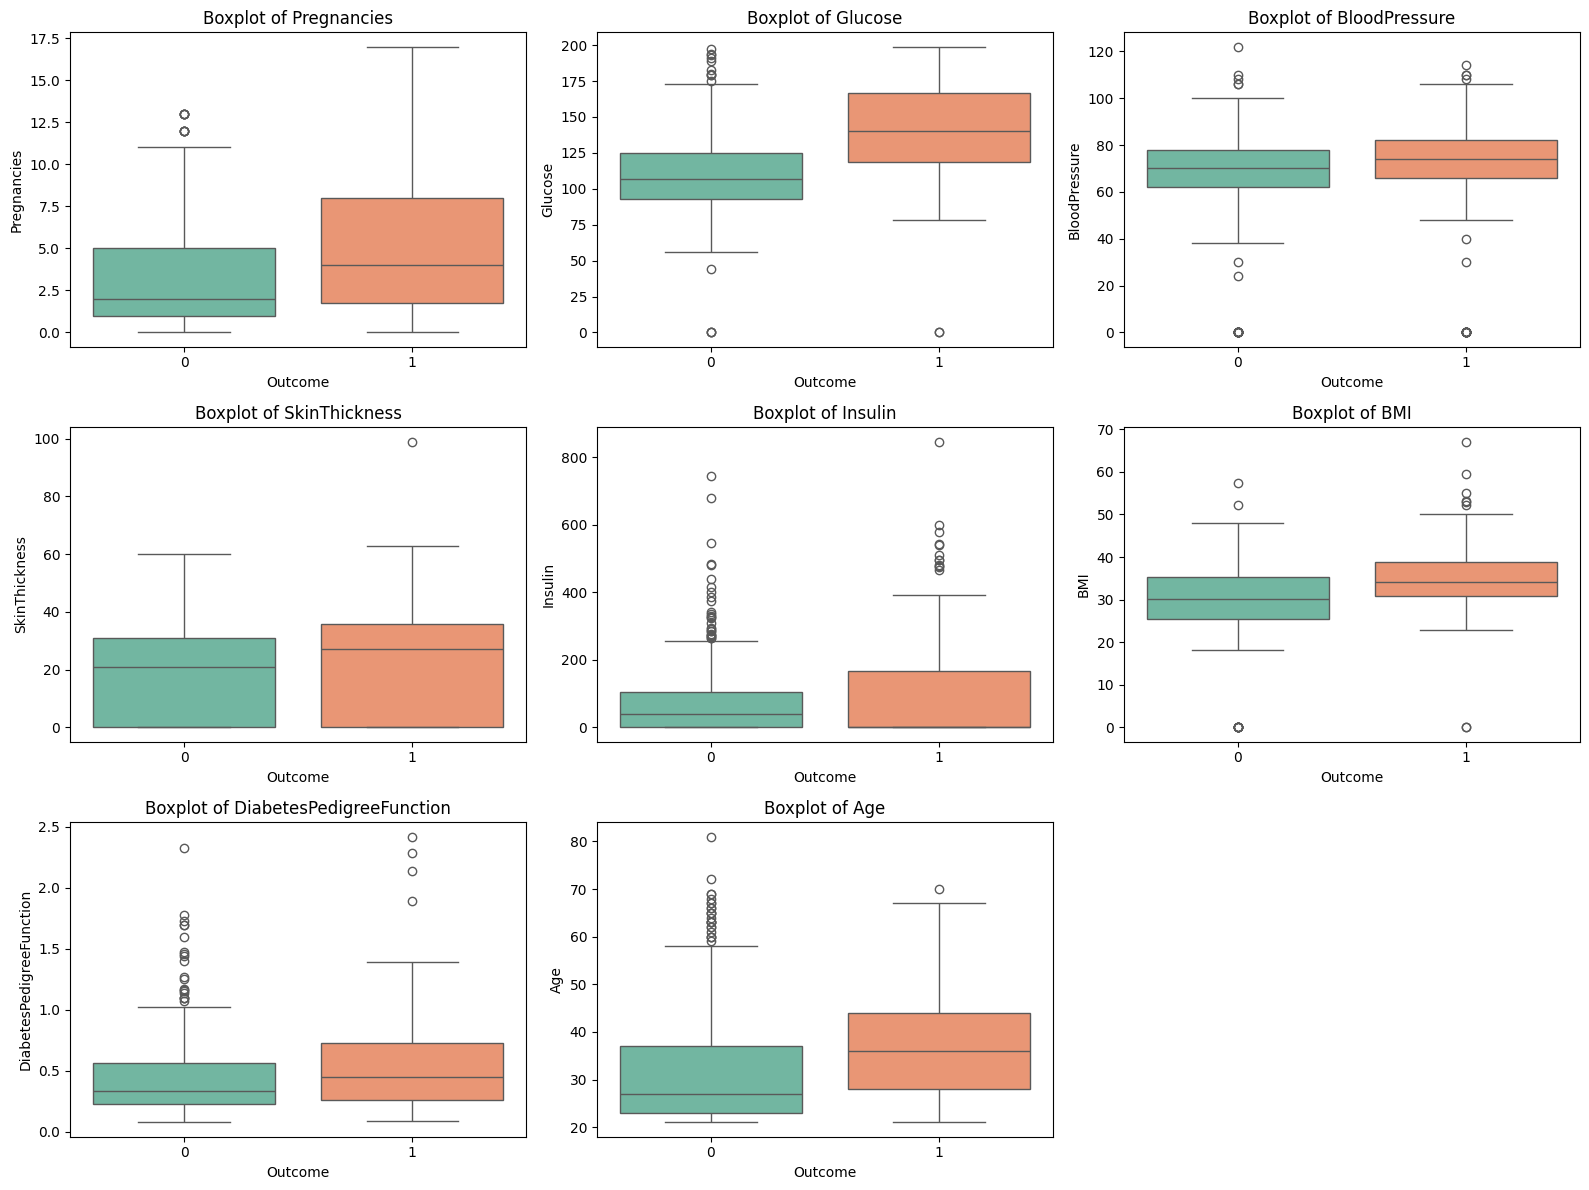

In [5]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=diabetes_data, x='Outcome', y=feature, hue='Outcome', palette='Set2')
    plt.title(f'Boxplot of {feature}')
    plt.legend([], [], frameon=False)  
plt.tight_layout()
plt.show()

Violin Plots

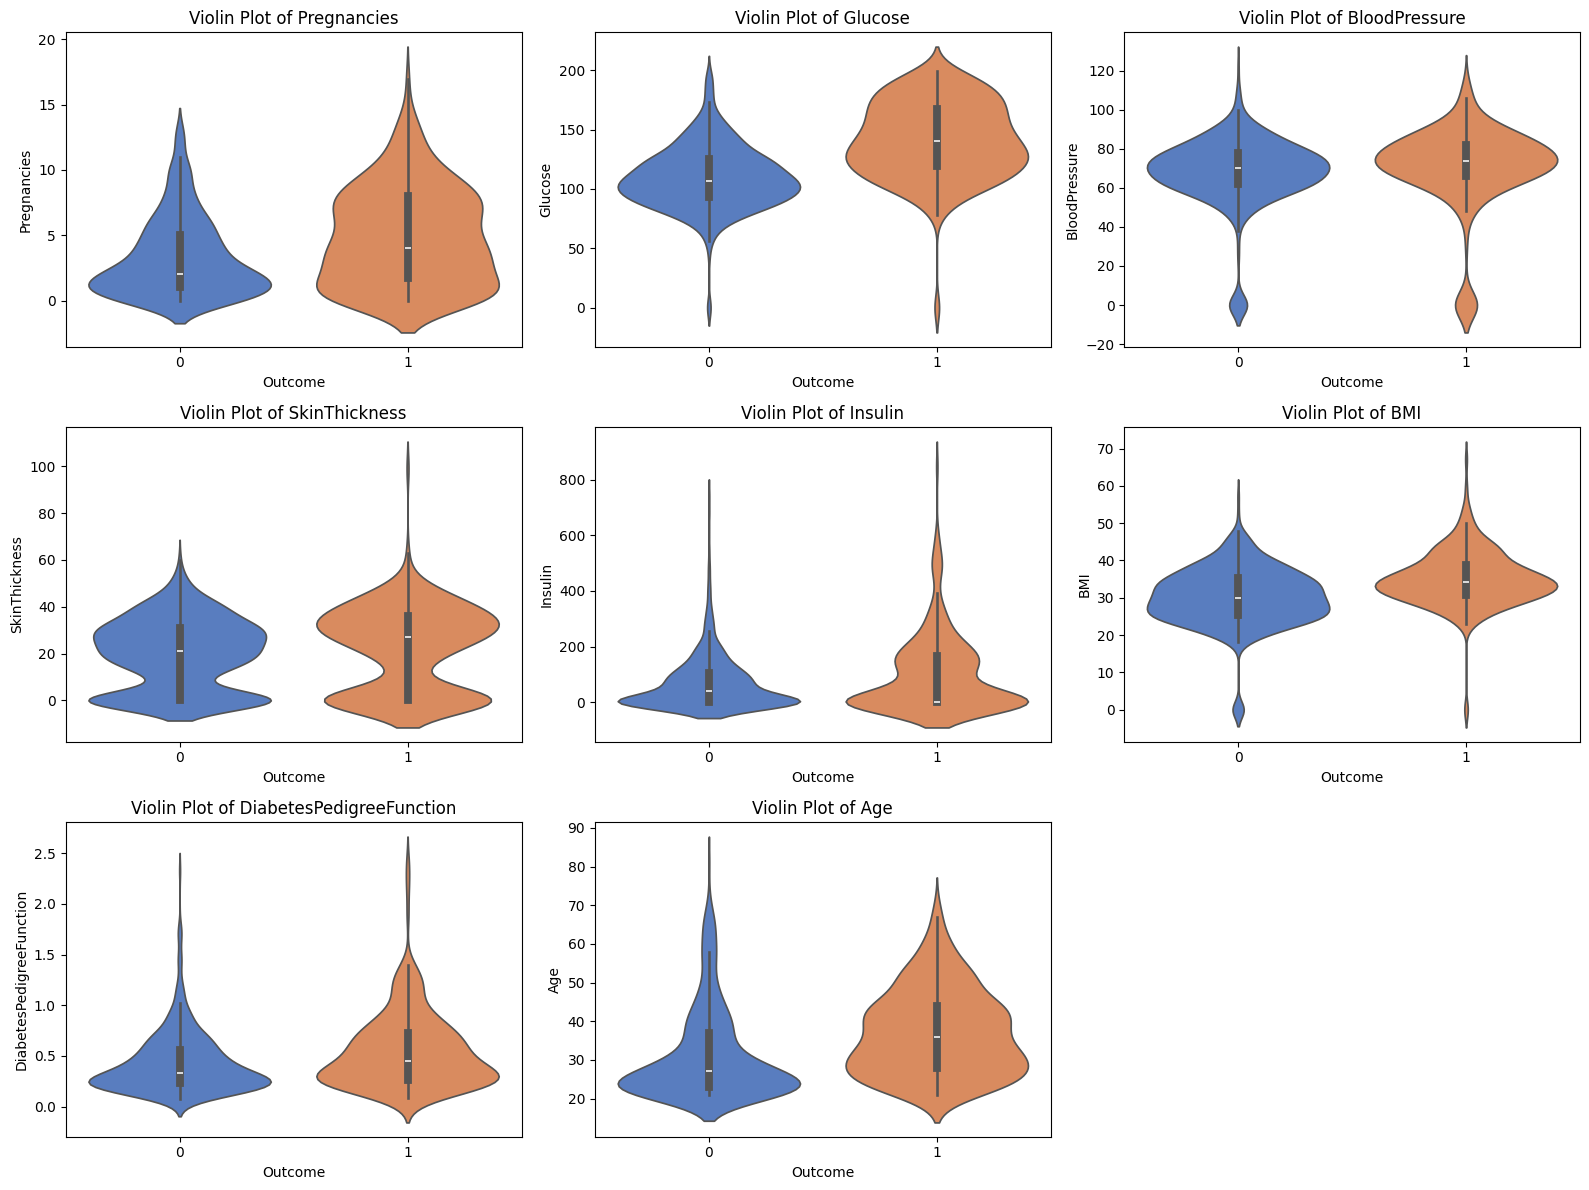

In [6]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=diabetes_data, x='Outcome', y=feature, hue='Outcome', palette='muted', legend=False)
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()

Histogram with Multiple Classes

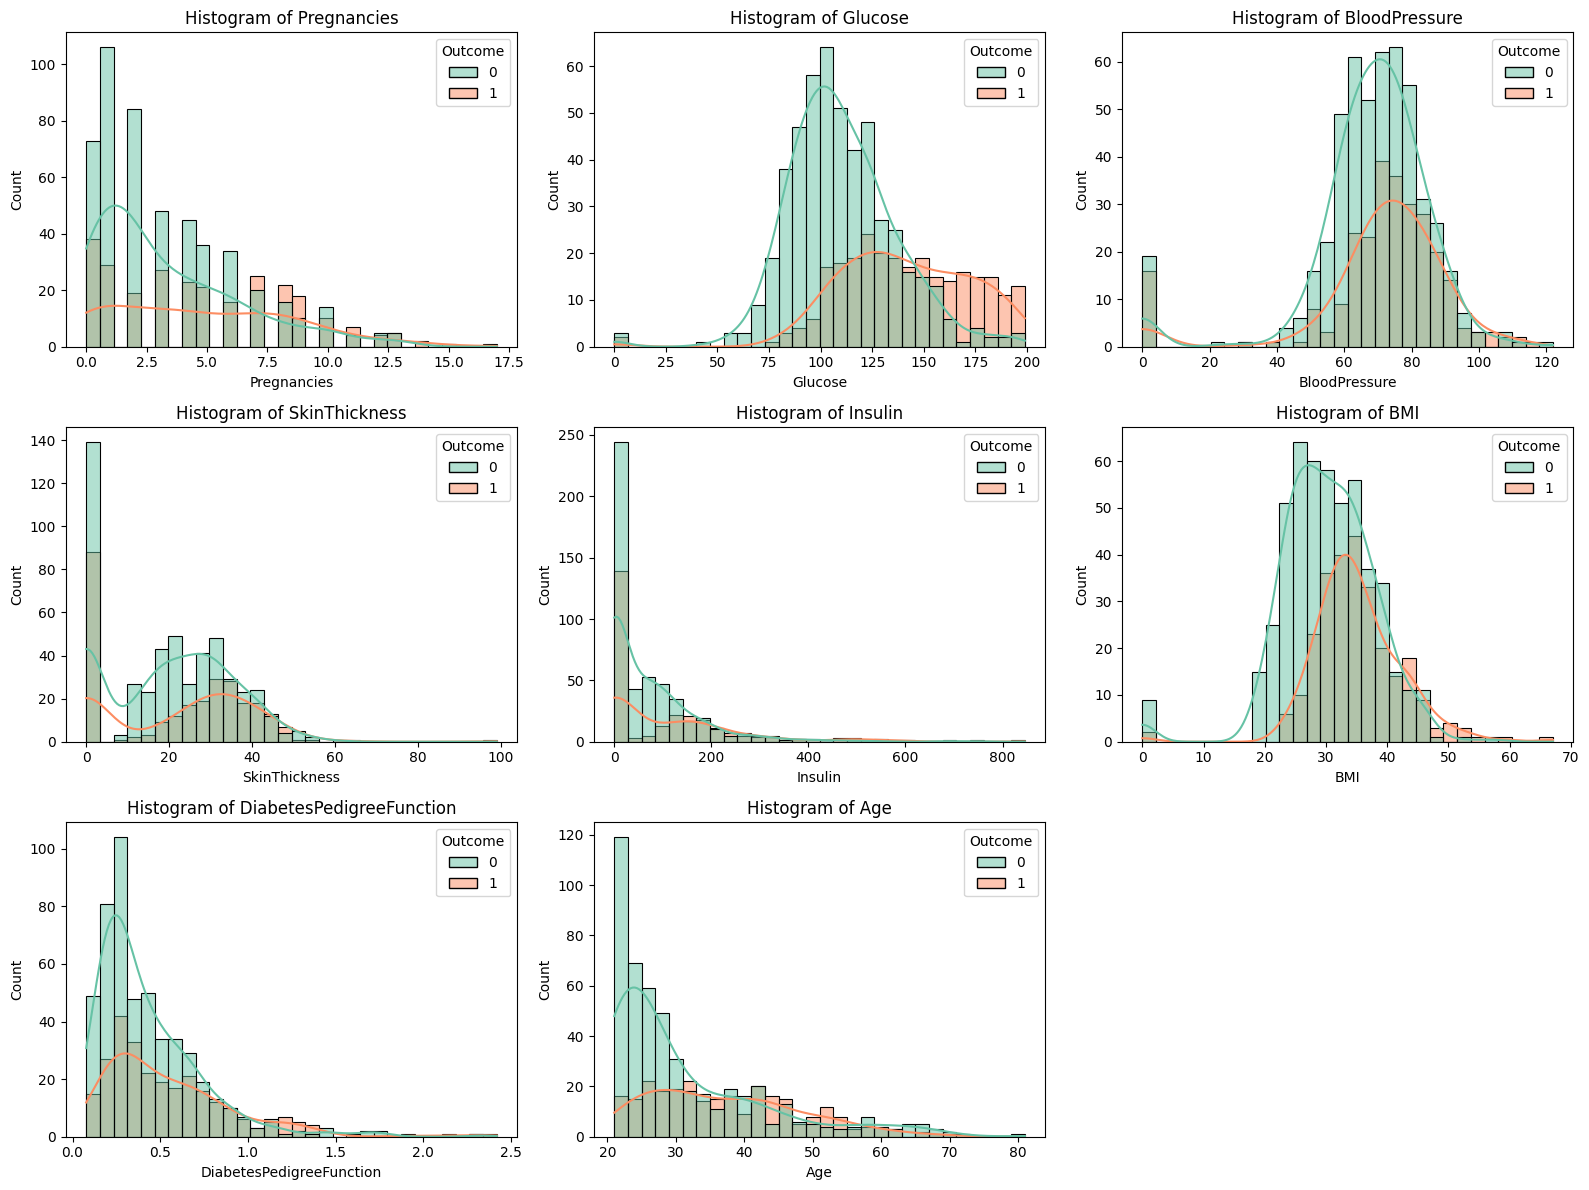

In [7]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=diabetes_data, x=feature, hue='Outcome', kde=True, bins=30, palette='Set2')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

Count Plot for Categorical Features

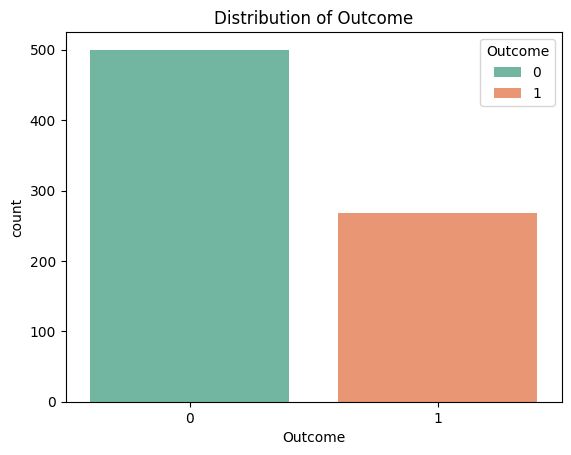

In [8]:
sns.countplot(
    data=diabetes_data, 
    x='Outcome', 
    hue='Outcome',
    palette='Set2', 
    dodge=False
)

plt.title('Distribution of Outcome') 
plt.show()


Feature Importance Plot

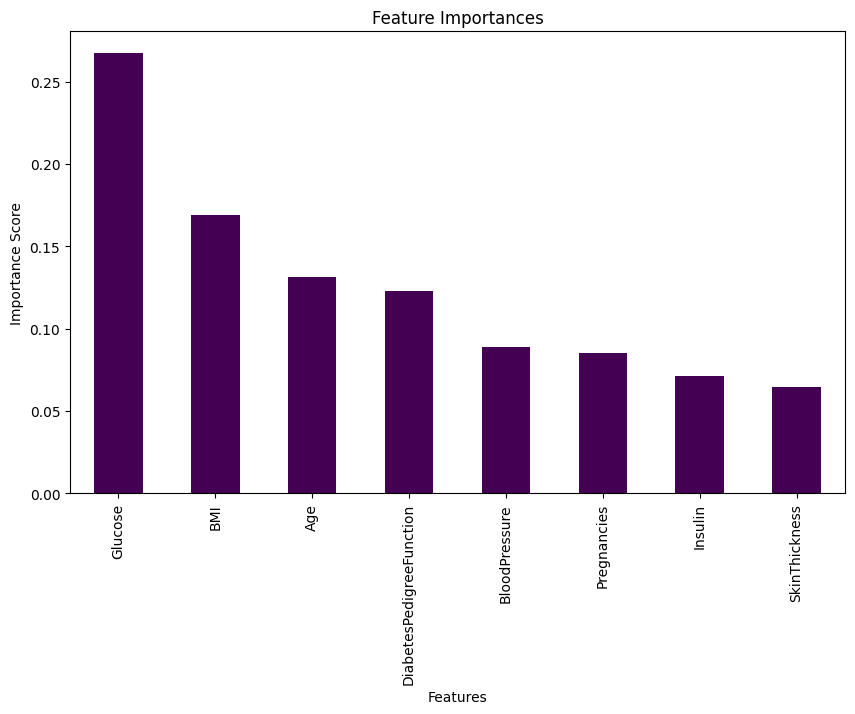

In [9]:
# Fit a Random Forest to compute feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(diabetes_data[features], diabetes_data['Outcome'])
feature_importances = pd.Series(rf.feature_importances_, index=features)

# Bar plot
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

Scatter Plots with Regression Lines

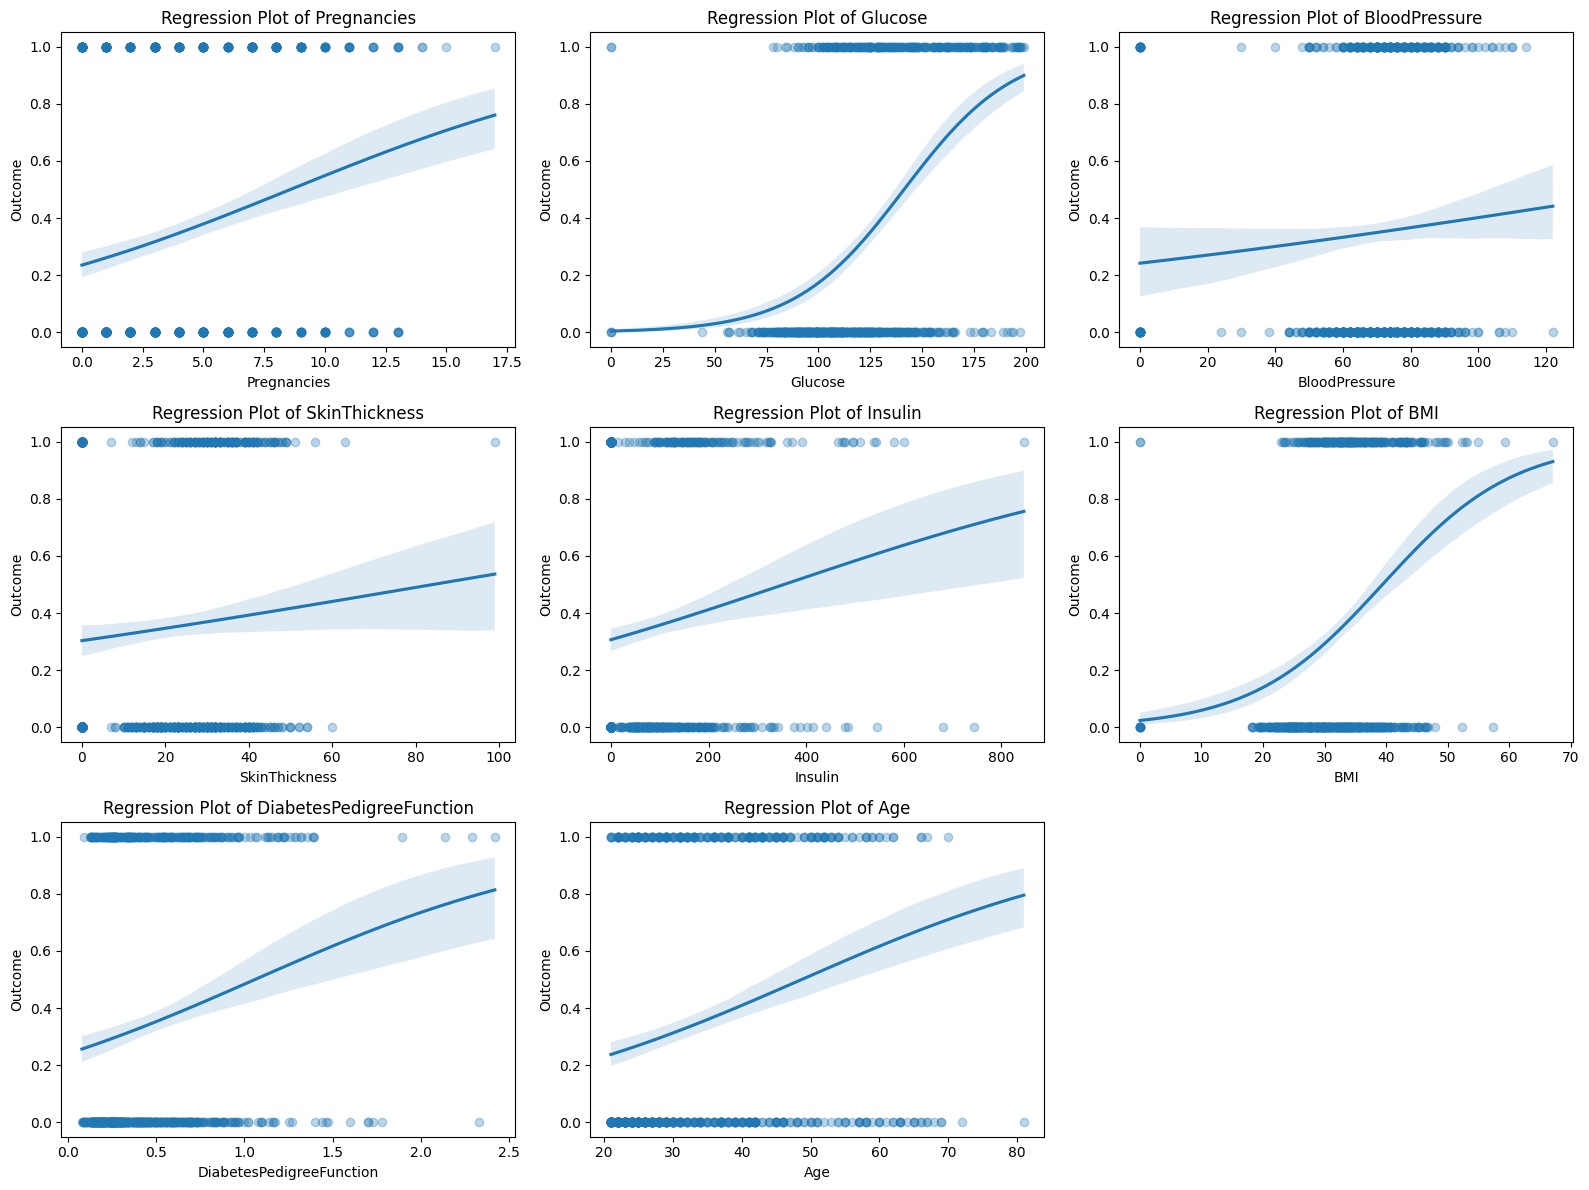

In [10]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(
        data=diabetes_data, 
        x=feature, 
        y='Outcome', 
        logistic=True, 
        scatter_kws={'alpha': 0.3}
    )
    plt.title(f'Regression Plot of {feature}')
plt.tight_layout()
plt.show()

Target Correlation Plot

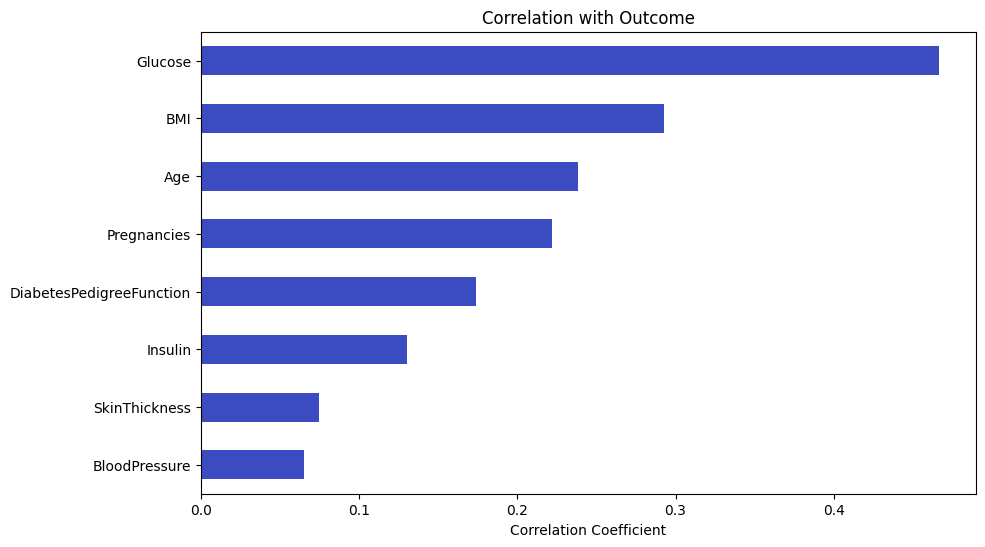

In [11]:
correlation_with_target = diabetes_data.corr()['Outcome'].drop('Outcome').sort_values()

plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='barh', colormap='coolwarm')
plt.title('Correlation with Outcome')
plt.xlabel('Correlation Coefficient')
plt.show()

PCA (Principal Component Analysis) Plot

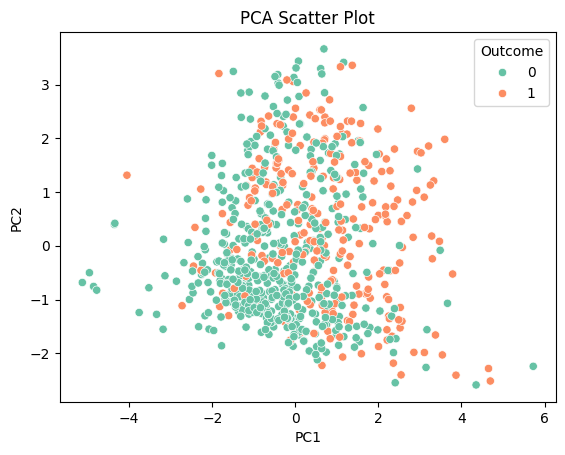

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaled_data = StandardScaler().fit_transform(diabetes_data[features])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Outcome'] = diabetes_data['Outcome']

# Scatter plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Outcome', palette='Set2')
plt.title('PCA Scatter Plot')
plt.show()

Outlier Detection with Boxplots or Z-Scores

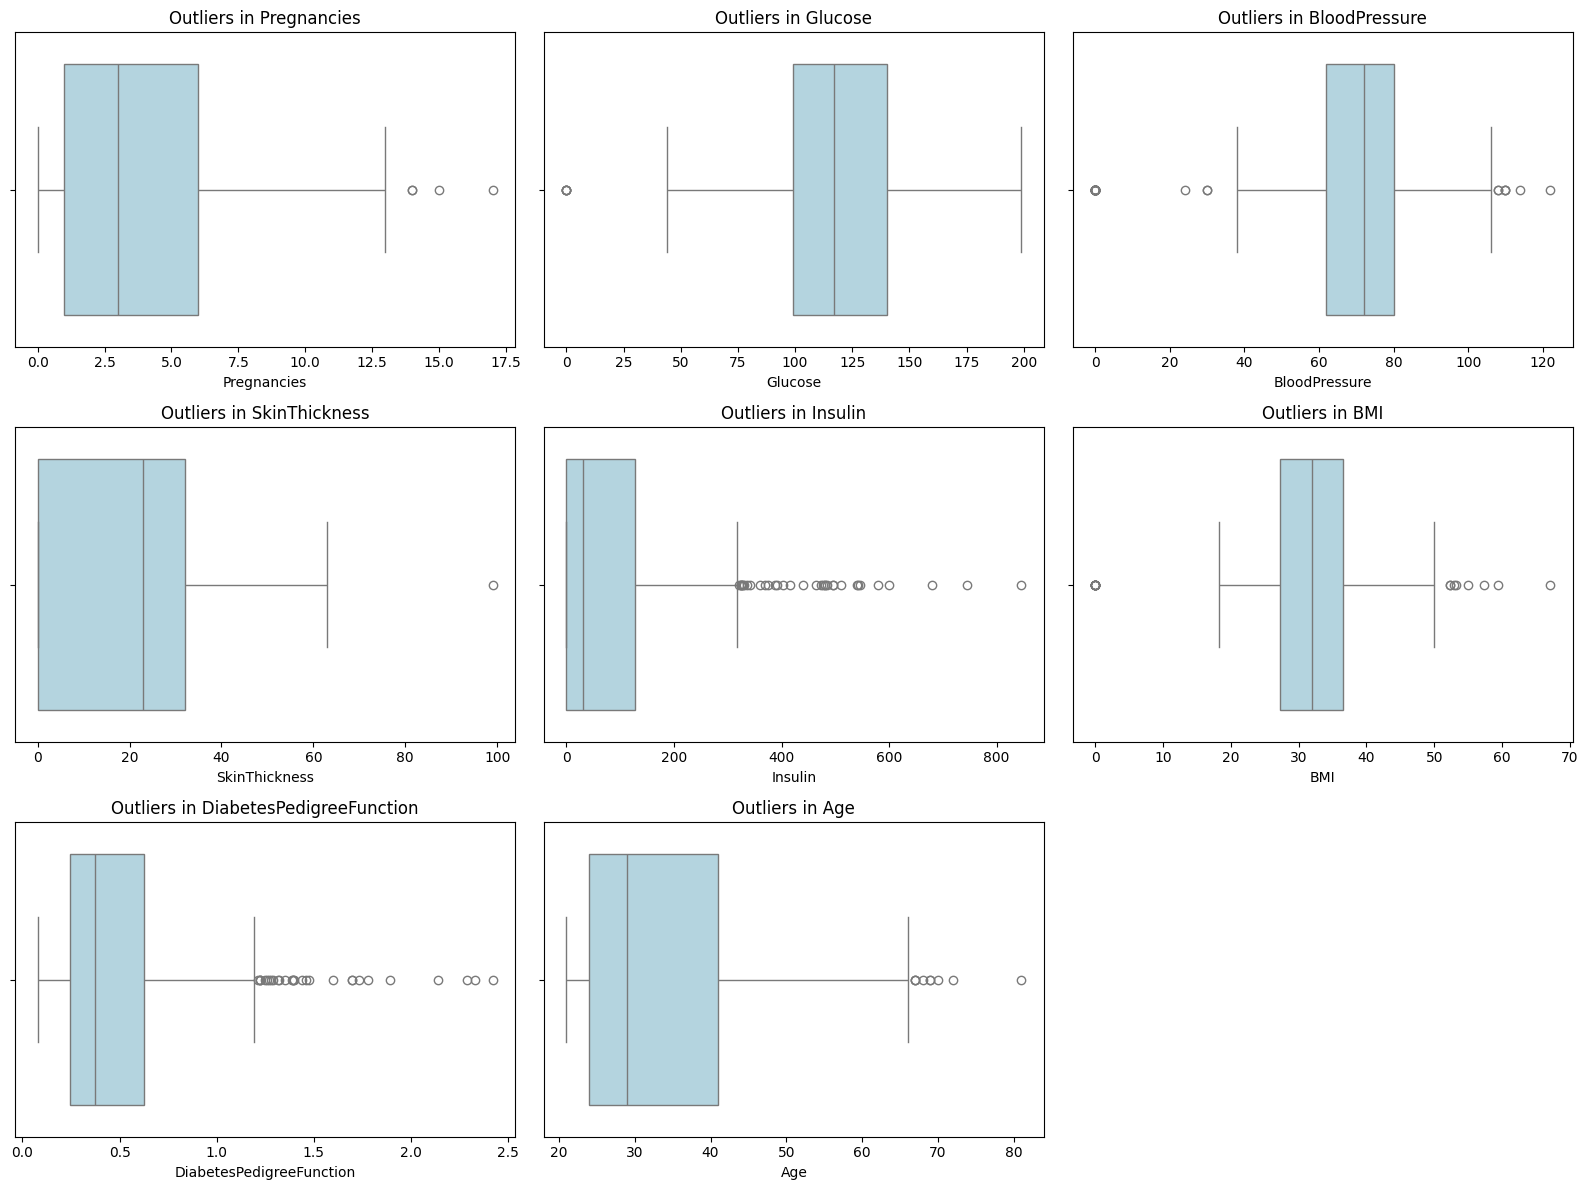

In [13]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=diabetes_data, x=feature, color='lightblue')
    plt.title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()

Pairwise Correlation Density

In [14]:
correlation_matrix = diabetes_data.corr()

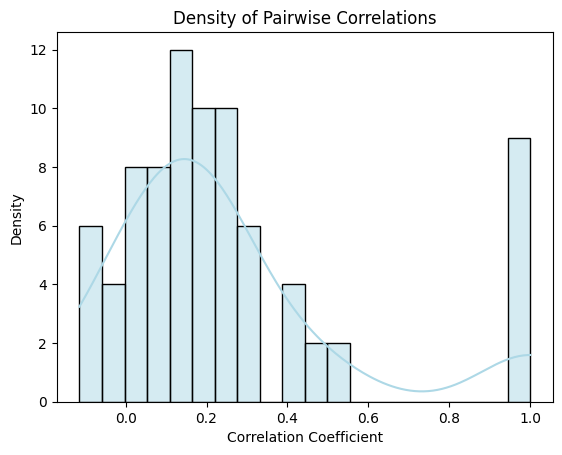

In [15]:
sns.histplot(correlation_matrix.values.flatten(), kde=True, bins=20, color='lightblue')
plt.title('Density of Pairwise Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.show()

### 2.1 Distribution Analysis

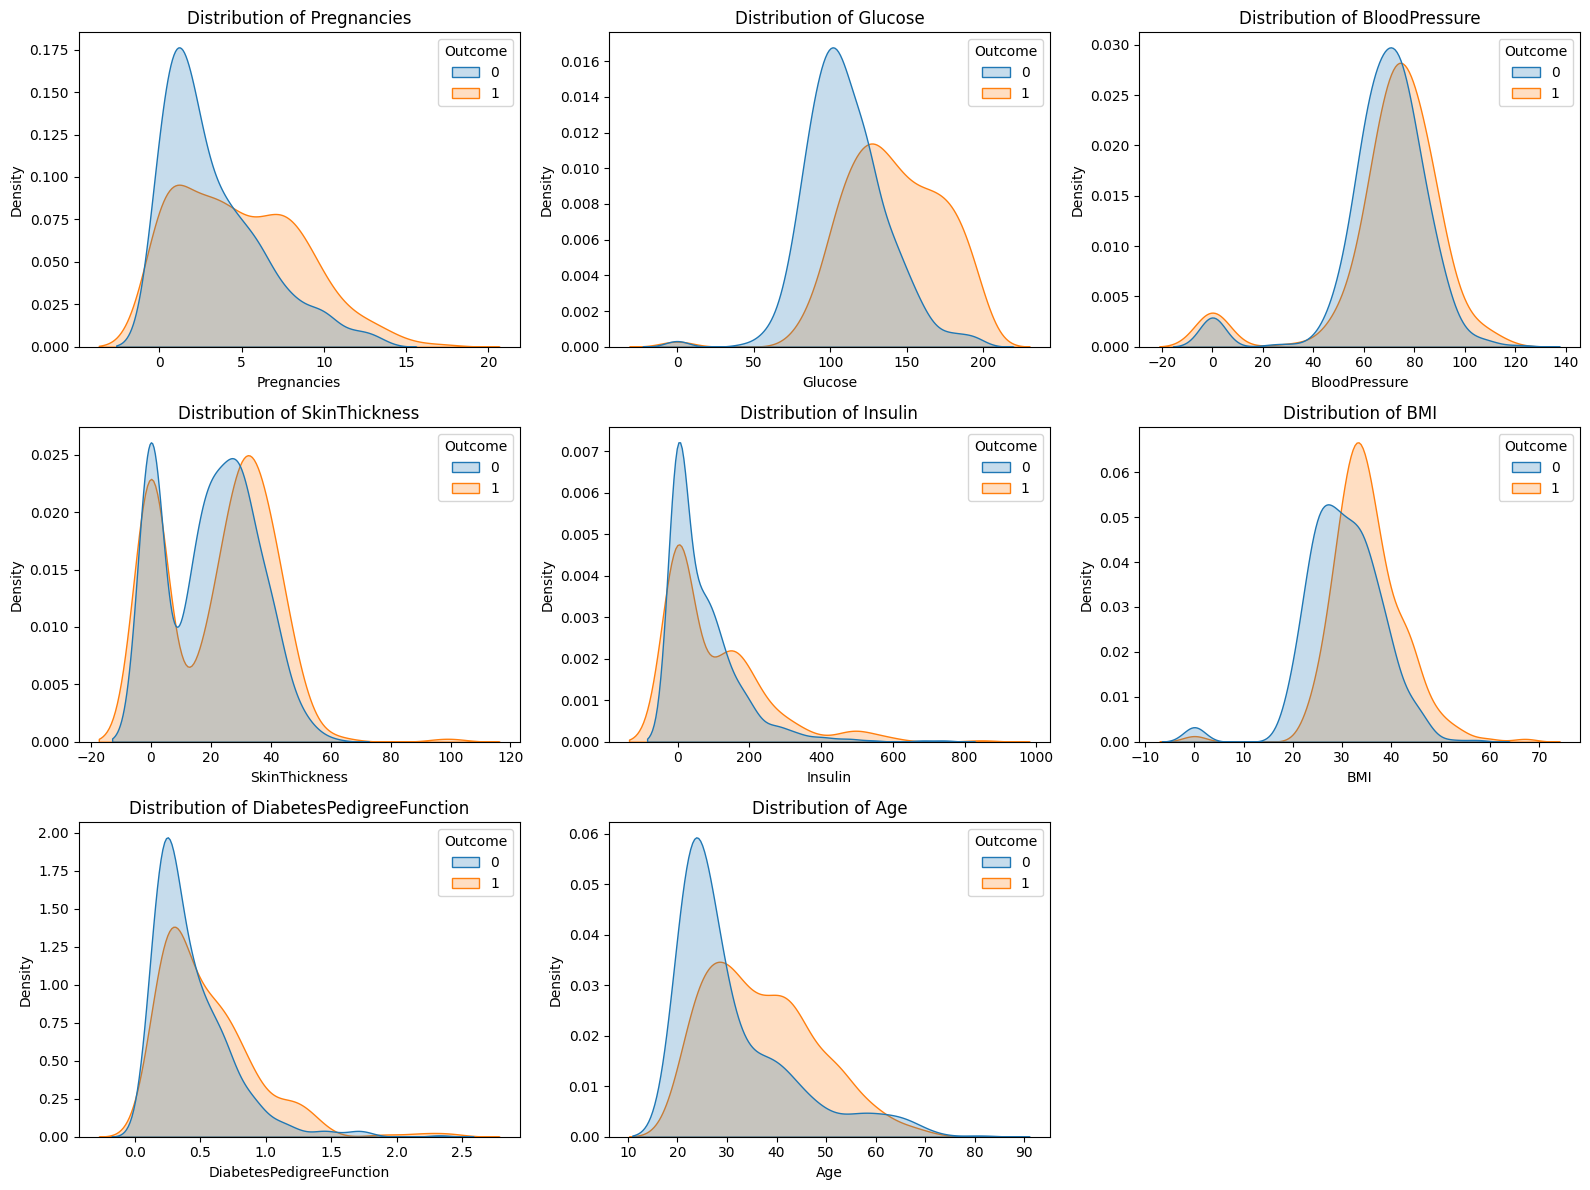

In [16]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    
    # Kernel Density Estimation
    sns.kdeplot(
        data=diabetes_data, 
        x=feature, 
        hue='Outcome', 
        fill=True, 
        common_norm=False
    )
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### 2.2 Statistical Significance Tests

In [17]:
print("Feature Significance Tests:")
for feature in features:
    diabetic = diabetes_data[diabetes_data['Outcome'] == 1][feature]
    non_diabetic = diabetes_data[diabetes_data['Outcome'] == 0][feature]
    t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic)
    print(f"{feature}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

Feature Significance Tests:
Pregnancies: t-statistic = 6.2984, p-value = 0.0000
Glucose: t-statistic = 14.6001, p-value = 0.0000
BloodPressure: t-statistic = 1.8047, p-value = 0.0715
SkinThickness: t-statistic = 2.0747, p-value = 0.0383
Insulin: t-statistic = 3.6443, p-value = 0.0003
BMI: t-statistic = 8.4718, p-value = 0.0000
DiabetesPedigreeFunction: t-statistic = 4.8858, p-value = 0.0000
Age: t-statistic = 6.7927, p-value = 0.0000


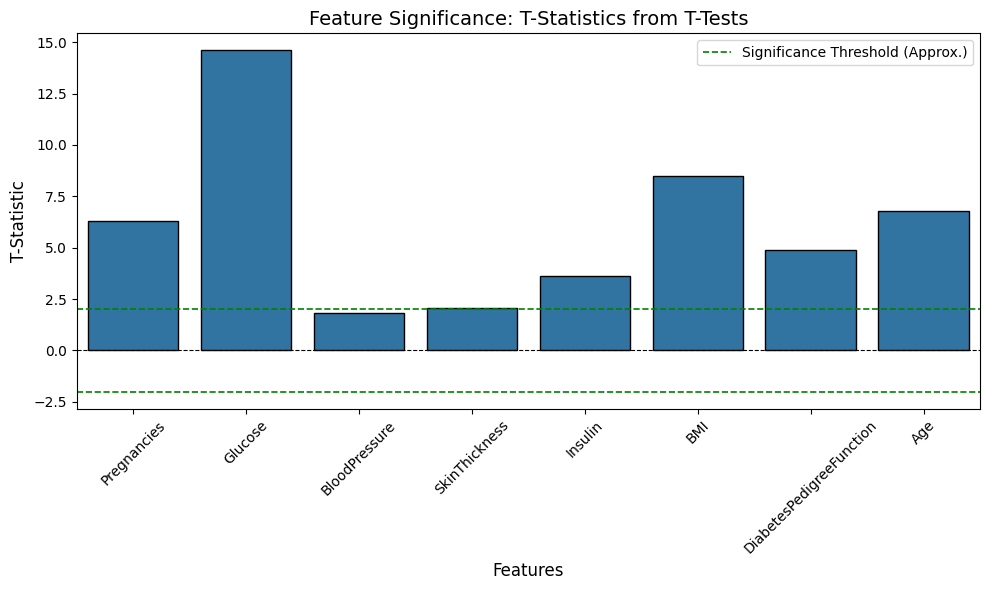


Significant Features (p < 0.05):
                    Feature  T-Statistic       P-Value
0               Pregnancies     6.298431  5.065127e-10
1                   Glucose    14.600060  8.935432e-43
3             SkinThickness     2.074700  3.834770e-02
4                   Insulin     3.644325  2.861865e-04
5                       BMI     8.471840  1.229807e-16
6  DiabetesPedigreeFunction     4.885826  1.254607e-06
7                       Age     6.792688  2.209975e-11


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Perform t-tests and store results
t_test_results = []
for feature in features:
    diabetic = diabetes_data[diabetes_data['Outcome'] == 1][feature]
    non_diabetic = diabetes_data[diabetes_data['Outcome'] == 0][feature]
    t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic)
    t_test_results.append((feature, t_stat, p_value))

# Convert results to DataFrame for easier plotting
t_test_df = pd.DataFrame(t_test_results, columns=["Feature", "T-Statistic", "P-Value"])

# Create a bar plot for T-Statistics
plt.figure(figsize=(10, 6))
sns.barplot(
    data=t_test_df, 
    x="Feature", 
    y="T-Statistic", 
    edgecolor="black"
)

# Highlight significance threshold
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axhline(2.0, color='green', linewidth=1.2, linestyle='--', label="Significance Threshold (Approx.)")
plt.axhline(-2.0, color='green', linewidth=1.2, linestyle='--')

# Add labels and title
plt.title("Feature Significance: T-Statistics from T-Tests", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("T-Statistic", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display significant features
significant_features = t_test_df[t_test_df['P-Value'] < 0.05]
print("\nSignificant Features (p < 0.05):")
print(significant_features)

### 2.3 Correlation Analysis

<Figure size 1200x1000 with 0 Axes>

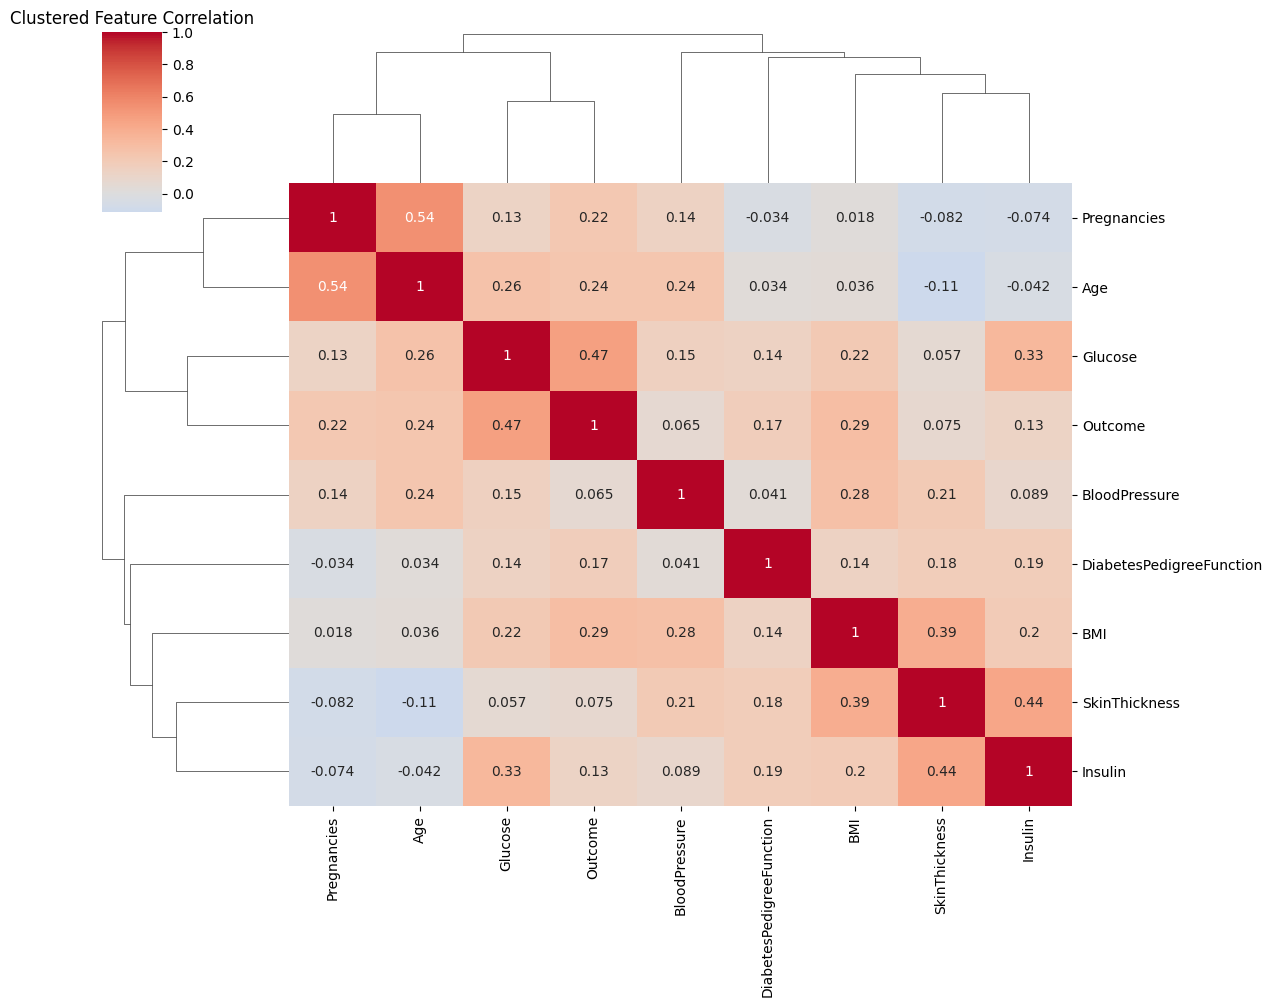

In [19]:
plt.figure(figsize=(12, 10))
# correlation_matrix = diabetes_data.corr()

# Clustered Heatmap
sns.clustermap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    figsize=(12, 10)
)
plt.title('Clustered Feature Correlation')
plt.show()

## 3. Data Preprocessing

### 3.1 Data Cleaning and Feature Engineering

In [20]:
df = diabetes_data.copy()

# Dynamically detect numerical columns for processing
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Handle Zero Values and Winsorization
for col in zero_columns:
    if col in numerical_columns:
        # Ensure the column is float to avoid dtype issues
        df[col] = df[col].astype(float)
        # Calculate Winsorization bounds
        p05, p95 = np.percentile(df[df[col] > 0][col], [5, 95])
        # Replace zero and outliers with capped values
        df.loc[(df[col] == 0) | (df[col] < p05), col] = p05
        df.loc[df[col] > p95, col] = p95

# Feature Engineering
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1)

# Prepare Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### 3.2 Outlier Detection

In [21]:
def detect_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers across numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

outliers_summary = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(diabetes_data[column])
    outliers_summary[column] = outliers.sum()

print("Outliers in each feature:")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")

Outliers in each feature:
Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 1 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


### 3.3 Feature Selection

In [22]:
# Statistical Feature Selection
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Age_Interaction']


### 3.4 Scaling and Dimensionality Reduction

In [23]:
# Advanced Scaling
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_selected)
print(X_scaled.shape)

# Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_reduced = pca.fit_transform(X_scaled)
print(X_reduced.shape)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(768, 6)
(768, 5)


((614, 5), (154, 5), (614,), (154,))

## 4. Fuzzy Membership Functions

In [24]:
# 4. Update Fuzzy Membership Function Creation
def create_fuzzy_membership_features(X, features):
    fuzzy_features = []
    for feature in features:
        values = X[feature].values
        
        # Define fuzzy universe for the feature
        universe = np.linspace(values.min(), values.max(), 100)
        
        # Create membership functions
        low = fuzz.trimf(universe, [universe.min(), universe.min(), universe.mean()])
        medium = fuzz.trimf(universe, [universe.min(), universe.mean(), universe.max()])
        high = fuzz.trimf(universe, [universe.mean(), universe.max(), universe.max()])
        
        # Calculate membership values
        low_membership = fuzz.interp_membership(universe, low, values)
        medium_membership = fuzz.interp_membership(universe, medium, values)
        high_membership = fuzz.interp_membership(universe, high, values)
        
        # Append fuzzy features
        fuzzy_features.append(low_membership)
        fuzzy_features.append(medium_membership)
        fuzzy_features.append(high_membership)
    
    # Stack fuzzy features and return as DataFrame
    fuzzy_features = np.vstack(fuzzy_features).T
    fuzzy_feature_names = [f"{feature}_{lvl}" for feature in features for lvl in ['low', 'medium', 'high']]
    return pd.DataFrame(fuzzy_features, columns=fuzzy_feature_names)

In [25]:
# Add Fuzzy Membership Features to X
fuzzy_features = create_fuzzy_membership_features(df, ['Glucose', 'BMI', 'Age'])
fuzzy_features

,Glucose_low,Glucose_medium,Glucose_high,BMI_low,BMI_medium,BMI_high,Age_low,Age_medium,Age_high
0,0.000000,0.653465,0.346535,0.000000,0.977578,0.022422,0.033333,0.966667,0.0
1,0.900990,0.099010,0.000000,0.605381,0.394619,0.000000,0.666667,0.333333,0.0
2,0.000000,0.000000,1.000000,0.901345,0.098655,0.000000,0.633333,0.366667,0.0
3,0.821782,0.178218,0.000000,0.470852,0.529148,0.000000,1.000000,0.000000,0.0
4,0.000000,0.871287,0.128713,0.000000,0.125561,0.874439,0.600000,0.400000,0.0
...,...,...,...,...,...,...,...,...,...
763,0.584158,0.415842,0.000000,0.040359,0.959641,0.000000,0.000000,0.600000,0.4
764,0.168317,0.831683,0.000000,0.000000,0.690583,0.309417,0.800000,0.200000,0.0
765,0.188119,0.811881,0.000000,0.641256,0.358744,0.000000,0.700000,0.300000,0.0
766,0.089109,0.910891,0.000000,0.291480,0.708520,0.000000,0.133333,0.866667,0.0


In [26]:
X_fuzzy = pd.concat([X.reset_index(drop=True), fuzzy_features.reset_index(drop=True)], axis=1)
X_fuzzy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Age_Interaction,Glucose_Insulin_Ratio,Glucose_low,Glucose_medium,Glucose_high,BMI_low,BMI_medium,BMI_high,Age_low,Age_medium,Age_high
0,6,148.0,72.0,35.0,41.65,33.6,0.627,50,1680.0,3.470106,0.000000,0.653465,0.346535,0.000000,0.977578,0.022422,0.033333,0.966667,0.0
1,1,85.0,66.0,29.0,41.65,26.6,0.351,31,824.6,1.992966,0.900990,0.099010,0.000000,0.605381,0.394619,0.000000,0.666667,0.333333,0.0
2,8,181.0,64.0,13.0,41.65,23.3,0.672,32,745.6,4.243845,0.000000,0.000000,1.000000,0.901345,0.098655,0.000000,0.633333,0.366667,0.0
3,1,89.0,66.0,23.0,94.00,28.1,0.167,21,590.1,0.936842,0.821782,0.178218,0.000000,0.470852,0.529148,0.000000,1.000000,0.000000,0.0
4,0,137.0,52.0,35.0,168.00,43.1,2.288,33,1422.3,0.810651,0.000000,0.871287,0.128713,0.000000,0.125561,0.874439,0.600000,0.400000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,46.0,180.00,32.9,0.171,63,2072.7,0.558011,0.584158,0.415842,0.000000,0.040359,0.959641,0.000000,0.000000,0.600000,0.4
764,2,122.0,70.0,27.0,41.65,36.8,0.340,27,993.6,2.860492,0.168317,0.831683,0.000000,0.000000,0.690583,0.309417,0.800000,0.200000,0.0
765,5,121.0,72.0,23.0,112.00,26.2,0.245,30,786.0,1.070796,0.188119,0.811881,0.000000,0.641256,0.358744,0.000000,0.700000,0.300000,0.0
766,1,126.0,60.0,13.0,41.65,30.1,0.349,47,1414.7,2.954279,0.089109,0.910891,0.000000,0.291480,0.708520,0.000000,0.133333,0.866667,0.0


In [27]:
# Re-apply scaling and dimensionality reduction with extended features
X_scaled_fuzzy = std_scaler.fit_transform(X_fuzzy)

X_scaled_fuzzy, X_scaled_fuzzy.shape

(array([[ 0.63994726,  0.92073931,  0.0572175 , ..., -1.76386687,
          2.06873415, -0.26167255],
        [-0.84488505, -1.25972424, -0.46799809, ...,  0.14476795,
         -0.07227304, -0.26167255],
        [ 1.23388019,  2.06288688, -0.64306996, ...,  0.04431348,
          0.04041155, -0.26167255],
        ...,
        [ 0.3429808 , -0.01374507,  0.0572175 , ...,  0.24522241,
         -0.18495763, -0.26167255],
        [-0.84488505,  0.15930759, -0.99321369, ..., -1.46250347,
          1.73068038, -0.26167255],
        [-0.84488505, -0.98283998, -0.11785437, ...,  0.94840366,
         -0.97374975, -0.26167255]]),
 (768, 19))

In [28]:
X_reduced_fuzzy = pca.fit_transform(X_scaled_fuzzy)

X_reduced_fuzzy, X_reduced_fuzzy.shape

(array([[ 3.6595902 , -0.85261406, -0.06709266, ...,  0.99333677,
          0.28411652,  0.86388267],
        [-2.15376565, -1.10935164, -1.18754404, ..., -0.26638028,
         -0.28609423,  0.42650345],
        [ 0.28495364, -1.95756004,  3.7443669 , ...,  0.79110577,
          0.31134979,  0.91863921],
        ...,
        [-1.07349267, -0.66038019,  0.85114805, ..., -0.44073102,
         -0.23325921,  0.27371425],
        [ 1.40273423, -1.96662446,  0.24895464, ...,  0.42100208,
          1.17737835, -0.96243401],
        [-2.39828285,  0.21005619, -0.95587113, ..., -0.37308961,
         -0.57883297,  0.58968296]]),
 (768, 10))

In [29]:
# Stratified Train-Test Split
X_train_fuzzy, X_test_fuzzy, y_train_fuzzy, y_test_fuzzy = train_test_split(
    X_reduced_fuzzy, y, test_size=0.2, stratify=y, random_state=42)

X_reduced_fuzzy.shape, X_test_fuzzy.shape, y_train_fuzzy.shape, y_test_fuzzy.shape

((768, 10), (154, 10), (614,), (154,))

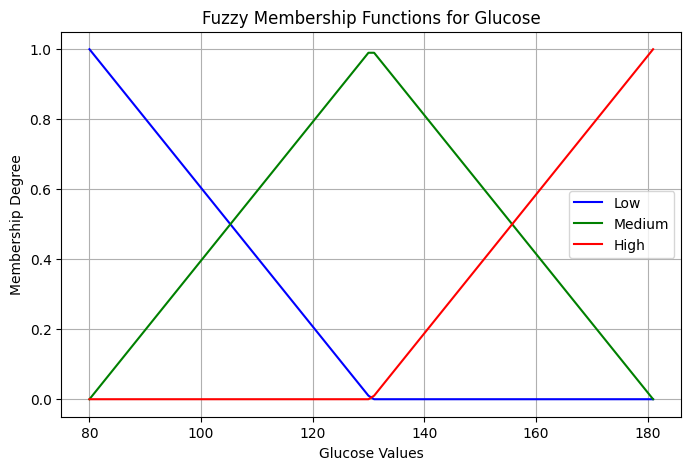

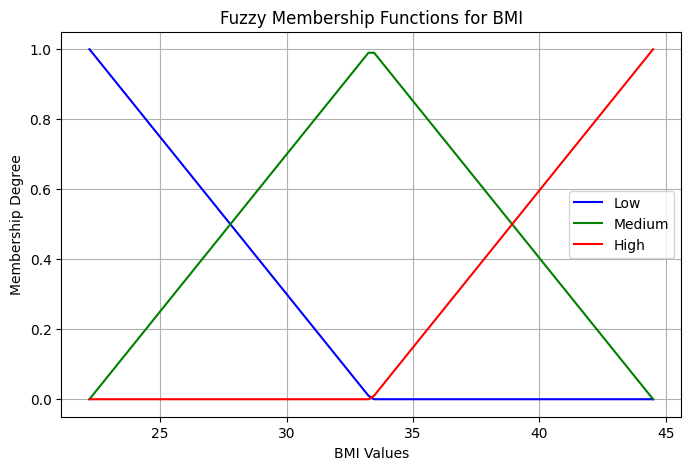

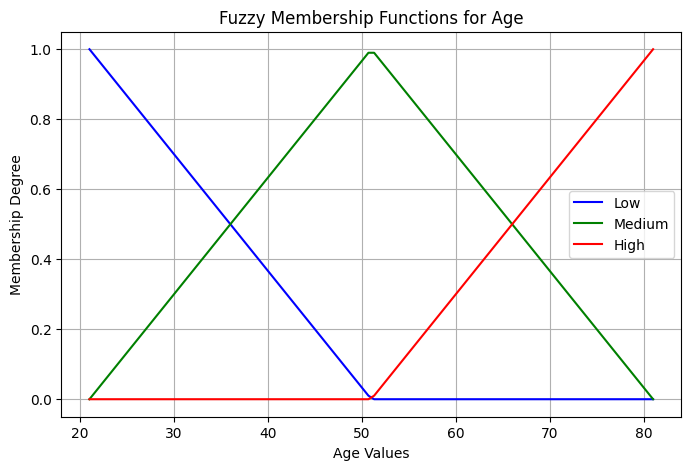

In [30]:
# Function to plot fuzzy membership functions
def plot_fuzzy_membership(feature_name, values):
    # Define the fuzzy universe
    universe = np.linspace(values.min(), values.max(), 100)

    # Create membership functions
    low = fuzz.trimf(universe, [universe.min(), universe.min(), universe.mean()])
    medium = fuzz.trimf(universe, [universe.min(), universe.mean(), universe.max()])
    high = fuzz.trimf(universe, [universe.mean(), universe.max(), universe.max()])

    # Plot the membership functions
    plt.figure(figsize=(8, 5))
    plt.plot(universe, low, label='Low', color='blue')
    plt.plot(universe, medium, label='Medium', color='green')
    plt.plot(universe, high, label='High', color='red')
    plt.title(f"Fuzzy Membership Functions for {feature_name}")
    plt.xlabel(f"{feature_name} Values")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with a feature from the dataset
feature_values = df['Glucose'].values  
plot_fuzzy_membership("Glucose", feature_values)
feature_values = df['BMI'].values 
plot_fuzzy_membership("BMI", feature_values)
feature_values = df['Age'].values
plot_fuzzy_membership("Age", feature_values)

## 5. Fuzzy Neural Network (FNN) Model

In [31]:
# 5. Modify Neural Network to Handle Extended Input
def build_fuzzy_model(input_shape):
    model = keras.Sequential([
        layers.Dense(
            64, 
            activation='swish',
            kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
            input_shape=(input_shape,)
        ),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(
            32, 
            activation='swish',
            kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
        ),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(
            16, 
            activation='relu',
            kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
        ),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = optimizers.Adam(
        learning_rate=1e-3, 
        beta_1=0.9, 
        beta_2=0.999
    )
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy', 
            keras.metrics.Precision(), 
            keras.metrics.Recall()
        ]
    )
    
    return model

fuzzy_model = build_fuzzy_model(X_train_fuzzy.shape[1])

c:\Users\arjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6. Model Training

In [32]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=5, 
    min_lr=1e-5
)

checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

In [33]:
# Train the Fuzzy Neural Model
history_fuzzy = fuzzy_model.fit(
    X_train_fuzzy, y_train_fuzzy,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6095 - loss: 0.6833 - precision: 0.4348 - recall: 0.5024 - val_accuracy: 0.7805 - val_loss: 0.6159 - val_precision: 0.7073 - val_recall: 0.6591 - learning_rate: 0.0010
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.5725 - precision: 0.5933 - recall: 0.6424 - val_accuracy: 0.7724 - val_loss: 0.5671 - val_precision: 0.6739 - val_recall: 0.7045 - learning_rate: 0.0010
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7098 - loss: 0.5770 - precision: 0.5802 - recall: 0.5293 - val_accuracy: 0.7724 - val_loss: 0.5361 - val_precision: 0.6600 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7560 - loss: 0.5366 - precision: 0.6565 - recall: 0.5950 - val_accuracy: 0.7805 - val_loss: 0.5125 - val_precision: 0.6735 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

## 7. Model Evaluation

In [34]:
# Evaluate the model on the test set
fuzzy_eval = fuzzy_model.evaluate(X_test_fuzzy, y_test_fuzzy, verbose=1)
print(f"Fuzzy Neural Model Performance: {fuzzy_eval}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7702 - loss: 0.4934 - precision: 0.6614 - recall: 0.7413 
Fuzzy Neural Model Performance: [0.4788089692592621, 0.7857142686843872, 0.6779661178588867, 0.7407407164573669]


### 7.1 Performance Metrics

In [35]:
# Predictions
y_pred_proba = fuzzy_model.predict(X_test_fuzzy)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report
print("\n--- Detailed Model Performance ---")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

--- Detailed Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       100
           1       0.68      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



### 7.2 Visualization of Results

Training History

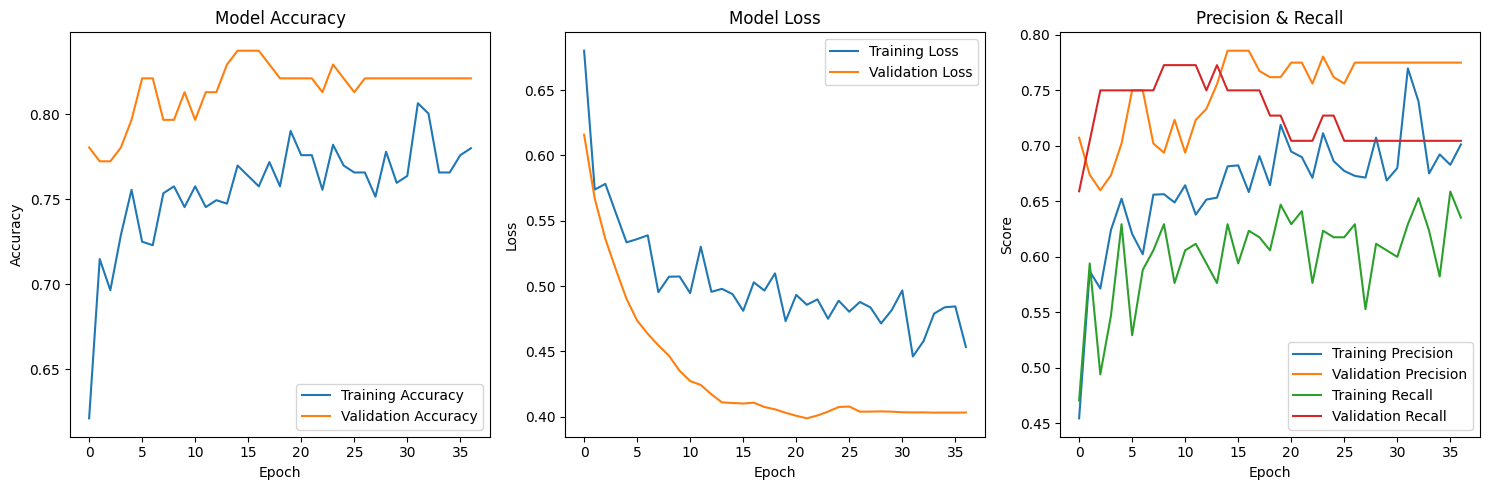

In [36]:
plt.figure(figsize=(15, 5))

# Accuracy Plot
plt.subplot(1, 3, 1)
plt.plot(history_fuzzy.history['accuracy'], label='Training Accuracy')
plt.plot(history_fuzzy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 3, 2)
plt.plot(history_fuzzy.history['loss'], label='Training Loss')
plt.plot(history_fuzzy.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precision and Recall
plt.subplot(1, 3, 3)
plt.plot(history_fuzzy.history['precision'], label='Training Precision')
plt.plot(history_fuzzy.history['val_precision'], label='Validation Precision')
plt.plot(history_fuzzy.history['recall'], label='Training Recall')
plt.plot(history_fuzzy.history['val_recall'], label='Validation Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

ROC Curve, Confusion Matrix and Precision-Recall Curve

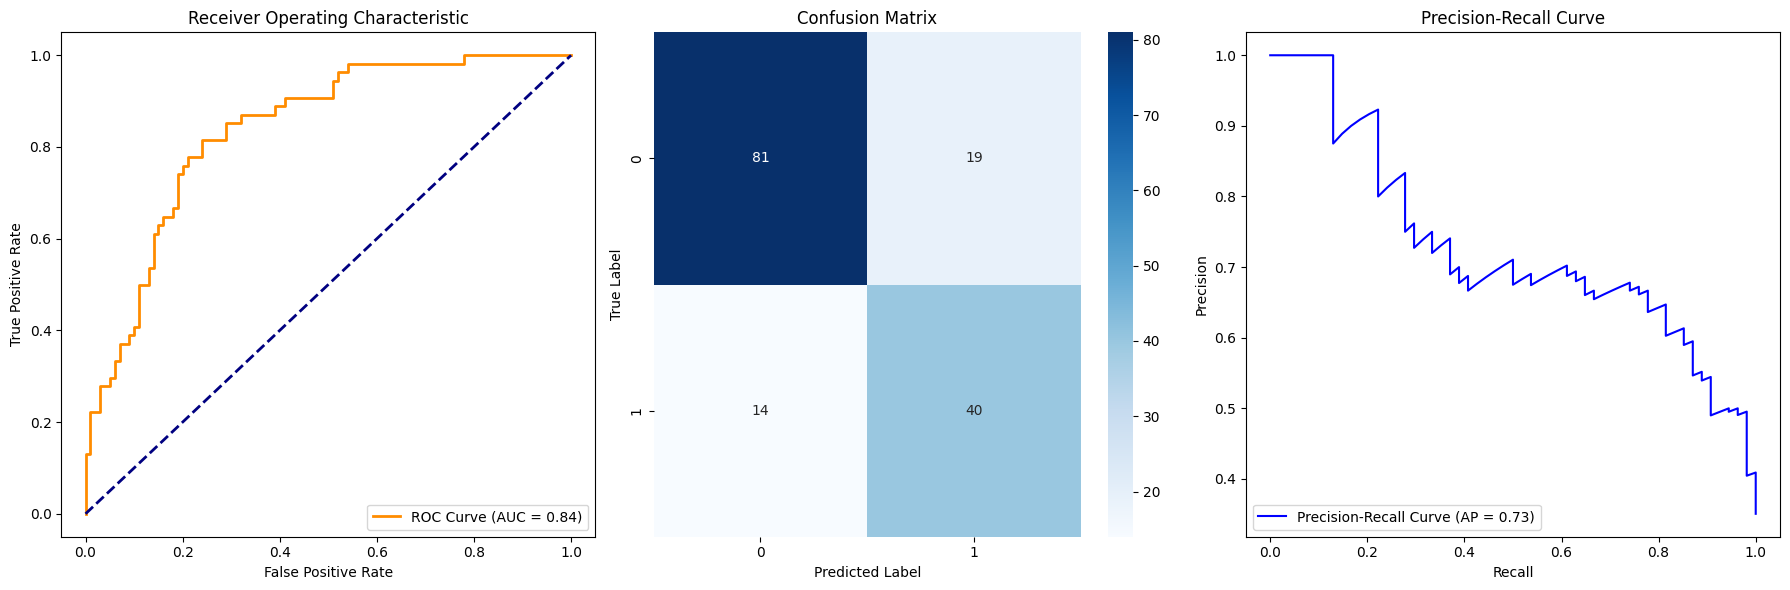

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

cm = confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ROC Curve
axs[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0].set_title('Receiver Operating Characteristic')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc="lower right")

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')

# Precision-Recall Curve
axs[2].plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
axs[2].set_title('Precision-Recall Curve')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].legend(loc="lower left")

plt.tight_layout()
plt.show()